# <span style="color:blue; font-size:16;">SGF 2020 Demo SASPy</span>

## Important links
Repo: https://github.com/sassoftware/saspy
        
Doc: https://sassoftware.github.io/saspy/index.html
        
Examples: https://github.com/sassoftware/saspy-examples
        

### Slide reference: Usage; Helpful tips

# Import the saspy module to get access to SAS
## to see where saspy is installed (where you're running from) just submit saspy after importing it

In [1]:
import saspy
saspy

<module 'saspy' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\saspy\\__init__.py'>

### And to see the default config file it will use, just submit this

In [2]:
saspy.SAScfg

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\saspy\\sascfg_personal.py'

### To see all config files that may exist in the search paths, just submit this

In [3]:
saspy.list_configs()

['C:\\ProgramData\\Anaconda3\\lib\\site-packages\\saspy\\sascfg_personal.py',
 'C:\\Users\\sastpw/.config/saspy\\sascfg_personal.py']

# Instantiate a SASsession object. This creates the SAS session that will be used for this notebook
## And submit the SASsession object to get info about your session

In [4]:
sas = saspy.SASsession(cfgname='winlocal', results='HTML')
sas

SAS Connection established. Subprocess id is 28616



Access Method         = IOM
SAS Config name       = winlocal
SAS Config file       = C:\ProgramData\Anaconda3\lib\site-packages\saspy\sascfg_personal.py
WORK Path             = C:\Users\sastpw\AppData\Local\Temp\SAS Temporary Files\_TD29096_d10a626_\Prc2\
SAS Version           = 9.04.01M5P09132017
SASPy Version         = 3.2.0
Teach me SAS          = False
Batch                 = False
Results               = HTML
SAS Session Encoding  = wlatin1
Python Encoding value = cp1252
SAS process Pid value = 29096


## Create a SASdata object to use to access the cars data set in the sashelp library. 
### And submit it to see info about it too

In [5]:
cars = sas.sasdata('cars', libref='sashelp')
cars

Libref  = sashelp
Table   = cars
Dsopts  = {}
Results = HTML

### Slide reference: Usage; Troubleshooting

# Remember that you can always get at the SASLOG.
## so you can see the LOG from the last submitted code, or the entire Session LOG

In [6]:
print(sas.lastlog())

3                                                          The SAS System                             09:42 Thursday, March 12, 2020

20         
21         data _null_; e = exist("sashelp.'cars'n");
22         v = exist("sashelp.'cars'n", 'VIEW');
23          if e or v then e = 1;
24         te='TABLE_EXISTS='; put te e;run;

TABLE_EXISTS= 1
NOTE: DATA statement used (Total process time):
      real time           0.00 seconds
      cpu time            0.00 seconds
      

25         
26         
27         


In [7]:
print(sas.saslog())

1                                                          The SAS System                             09:42 Thursday, March 12, 2020

NOTE: Copyright (c) 2016 by SAS Institute Inc., Cary, NC, USA. 
NOTE: SAS (r) Proprietary Software 9.4 (TS1M5) 
      Licensed to Weber Tom-1347, Site 70068130.
NOTE: This session is executing on the X64_10PRO  platform.



NOTE: Updated analytical products:
      
      SAS/STAT 14.3
      SAS/ETS 14.3
      SAS/OR 14.3
      SAS/QC 14.3

NOTE: Additional host information:

 X64_10PRO WIN 10.0.16299  Workstation

NOTE: SAS Initialization used (Total process time):
      real time           0.00 seconds
      cpu time            0.01 seconds
      
1          ;*';*";*/;
2          options svgtitle='svgtitle'; options validvarname=any validmemname=extend pagesize=max nosyntaxcheck; ods graphics on;
3          
4          ;*';*";*/;
5          %put E3969440A681A2408885998500000001;
E3969440A681A2408885998500000001
6          
2                           

In [8]:
cars.contents()

### Slide reference: Specific Features; Results

### Lets use each of the RESULTS= options to see the output

In [9]:
carsp = sas.sasdata('cars', libref='sashelp', results='pandas')
carsh = sas.sasdata('cars', libref='sashelp', results='html')
carst = sas.sasdata('cars', libref='sashelp', results='text')
print(carsp,'\n', carsh, '\n', carst)

Libref  = sashelp
Table   = cars
Dsopts  = {}
Results = pandas
 
 Libref  = sashelp
Table   = cars
Dsopts  = {}
Results = html
 
 Libref  = sashelp
Table   = cars
Dsopts  = {}
Results = text



In [10]:
carsp.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6,225,18,24,3880,115,197


In [11]:
carsh.head()

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197


In [12]:
carst.head()


                                                           The SAS System                         09:42 Thursday, March 12, 2020   1

                                       Drive                   Engine                                 MPG_
 Obs Make  Model          Type  Origin Train     MSRP  Invoice  Size  Cylinders Horsepower MPG_City Highway Weight Wheelbase Length

   1 Acura MDX            SUV    Asia  All    $36,945  $33,337   3.5      6         265       17       23    4451     106      189 
   2 Acura RSX Type S 2dr Sedan  Asia  Front  $23,820  $21,761   2.0      4         200       24       31    2778     101      172 
   3 Acura TSX 4dr        Sedan  Asia  Front  $26,990  $24,647   2.4      4         200       22       29    3230     105      183 
   4 Acura TL 4dr         Sedan  Asia  Front  $33,195  $30,299   3.2      6         270       20       28    3575     108      186 
   5 Acura 3.5 RL 4dr     Sedan  Asia  Front  $43,755  $39,014   3.5      6         225       18 

### Slide reference: Specific Features; DSOPTS  (Data Set Options)

## Don't forget about being able to use DataSet OPTionS:  DSOPTS=

In [13]:
carst.dsopts={'drop':"origin wheelbase length weight", 'where' : 'horsepower > 400'}
carst

Libref  = sashelp
Table   = cars
Dsopts  = {'drop': 'origin wheelbase length weight', 'where': 'horsepower > 400'}
Results = text

In [14]:
carst.head(100)


                                                           The SAS System                         09:42 Thursday, March 12, 2020   2

                                                           Drive                   Engine                                 MPG_
     Obs Make          Model                         Type  Train     MSRP  Invoice  Size  Cylinders Horsepower MPG_City Highway

      21 Audi          RS 6 4dr                     Sports Front  $84,600  $76,417   4.2       8        450       15       22  
     115 Dodge         Viper SRT-10 convertible 2dr Sports Rear   $81,795  $74,451   8.3      10        500       12       20  
     263 Mercedes-Benz CL600 2dr                    Sedan  Rear  $128,420 $119,600   5.5      12        493       13       19  
     271 Mercedes-Benz SL55 AMG 2dr                 Sports Rear  $121,770 $113,388   5.5       8        493       14       21  
     272 Mercedes-Benz SL600 convertible 2dr        Sports Rear  $126,670 $117,854   5.5      12 

In [15]:
print(sas.lastlog())

21                                                         The SAS System                             09:42 Thursday, March 12, 2020

197        
198        proc print data=sashelp.'cars'n (drop=origin wheelbase length weight where=(horsepower > 400) obs=100 );run;

NOTE: There were 7 observations read from the data set SASHELP.CARS.
      WHERE horsepower>400;
NOTE: The PROCEDURE PRINT printed page 2.
NOTE: PROCEDURE PRINT used (Total process time):
      real time           0.01 seconds
      cpu time            0.00 seconds
      

199        
200        


## Here are a few sapy methods embedded in Python code


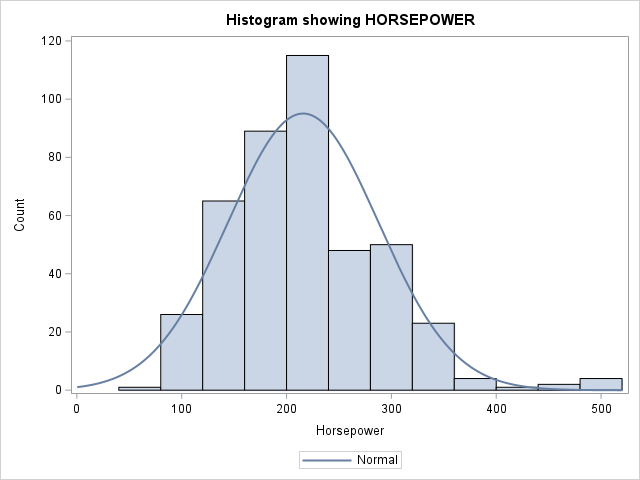


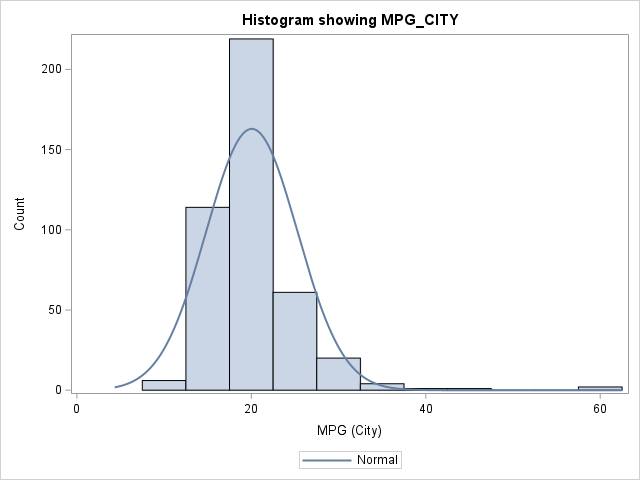


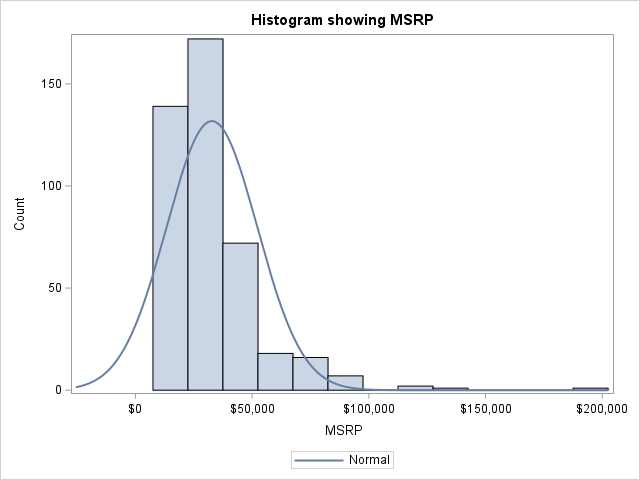

In [16]:
for col in ['horsepower','MPG_City', 'MSRP']:
    cars.hist(col, title='Histogram showing '+col.upper())

# you can get a list of the assigned libraries in your session

In [17]:
for libref in sas.assigned_librefs():
    print(libref)

WORK
SASHELP
MAPS
MAPSSAS
MAPSGFK
SASUSER


### see what tables (data sets or views) are in a library which saspy can access directly 

In [18]:
for mem in sas.list_tables('sasuser'):
    print(mem)

('SASMBC', 'DATA')
('YX1X2', 'DATA')


## Get information about a library including everything that's in it?

In [19]:
sas.datasets('sasuser')

### Slide reference: Specific Features; Submit

### With the submit() method, you can submit your own SAS code.

In [20]:
ll = sas.submit("""
libname work list;

proc sql;
   select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
   from sashelp.cars
   group by type
   order by 3 desc;
quit; 
""")

### submit() returns a dictionary with the results from the SASLOG and the Listing (output)
### You can print the LOG, it's text, and use the helper methods to display the LIST which is HTML

In [21]:
type(ll)

dict

In [22]:
ll.keys()

dict_keys(['LOG', 'LST'])

In [23]:
print(ll['LOG'])

33                                                         The SAS System                             09:42 Thursday, March 12, 2020

337        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
337      ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
338        
339        
340        libname work list;
NOTE: Libref=   WORK 
      Scope=    IOM ROOT COMP ENV
      Engine=   V9
      Access=   TEMP
      Physical Name= C:\Users\sastpw\AppData\Local\Temp\SAS Temporary Files\_TD29096_d10a626_\Prc2
      Filename= C:\Users\sastpw\AppData\Local\Temp\SAS Temporary Files\_TD29096_d10a626_\Prc2
      Owner Name= CARYNT\sastpw
      File Size=              4KB
      File Size (bytes)= 4096
341        
342        proc sql;
343           select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
344           from sashelp.cars
345           group by type
346      

### Slide reference: Specific Features; Display

### to display HTML yourself, you can use the helper functions: sas.DISPLAY(sas.HTML(result)) or sas.HTML(result) depending on notebook

In [24]:
sas.HTML(ll['LST'])
#sas.DISPLAY(sas.HTML(ll['LST']))  # need both on Zeppelin

Type,number of models,Avg(MPG_City)
Hybrid,3,55
Wagon,30,21.1
Sedan,262,21.08397
Sports,49,18.40816
Truck,24,16.5
SUV,60,16.1


### Slide reference: Specific Features; Submit

### New in V3.1.8 are convenience submit methods, which render the log and/or the list automatically

In [25]:
sas.submitLOG("""
libname work list;

proc sql;
   select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
   from sashelp.cars
   group by type
   order by 3 desc;
quit; 
""")

34                                                         The SAS System                             09:42 Thursday, March 12, 2020

354        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
354      ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
355        
356        
357        libname work list;
NOTE: Libref=   WORK 
      Scope=    IOM ROOT COMP ENV
      Engine=   V9
      Access=   TEMP
      Physical Name= C:\Users\sastpw\AppData\Local\Temp\SAS Temporary Files\_TD29096_d10a626_\Prc2
      Filename= C:\Users\sastpw\AppData\Local\Temp\SAS Temporary Files\_TD29096_d10a626_\Prc2
      Owner Name= CARYNT\sastpw
      File Size=              4KB
      File Size (bytes)= 4096
358        
359        proc sql;
360           select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
361           from sashelp.cars
362           group by type
363      

In [26]:
sas.submitLST("""
libname work list;

proc sql;
   select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
   from sashelp.cars
   group by type
   order by 3 desc;
quit; 
""")

Type,number of models,Avg(MPG_City)
Hybrid,3,55
Wagon,30,21.1
Sedan,262,21.08397
Sports,49,18.40816
Truck,24,16.5
SUV,60,16.1


### The submitLST() method has an option for controling the output too! 
### method = [**'listonly'** | 'listorlog' | 'listandlog' | 'logandlist']

In [27]:
sas.submitLST("""
libname work list;

proc sql;
   select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
   from sashelp.cars
   group by type
   order by 3 desc;
quit; 
""", method='listorlog')

Type,number of models,Avg(MPG_City)
Hybrid,3,55
Wagon,30,21.1
Sedan,262,21.08397
Sports,49,18.40816
Truck,24,16.5
SUV,60,16.1


### listorlog is handy when you expect some results, but if there's an error and none are produced, you get the log instead

In [28]:
sas.submitLST("""
libname work list;

p r o c s q l;
   select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
   from sashelp.cars
   group by type
   order by 3 desc;
quit; 
""", method='listorlog')

### When you want to see both, then set listandlog, or logandlist, depending on the order you'd like to see them

In [29]:
sas.submitLST("""
libname work list;

proc sql;
   select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
   from sashelp.cars
   group by type
   order by 3 desc;
quit; 
""", method='listandlog')

Type,number of models,Avg(MPG_City)
Hybrid,3,55
Wagon,30,21.1
Sedan,262,21.08397
Sports,49,18.40816
Truck,24,16.5
SUV,60,16.1


In [30]:
sas.submitLST("""
libname work list;

proc sql;
   select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
   from sashelp.cars
   group by type
   order by 3 desc;
quit; 
""", method='logandlist')

Type,number of models,Avg(MPG_City)
Hybrid,3,55
Wagon,30,21.1
Sedan,262,21.08397
Sports,49,18.40816
Truck,24,16.5
SUV,60,16.1


### Slide reference: Specific Features; Data Transfer

## We can transfer data between SAS Data Sets and Pandas Data Frames 

In [31]:
car_df = cars.to_df()

In [32]:
car_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [33]:
cars.head()

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197


In [34]:
car_df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
Invoice          int64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [35]:
cars.columnInfo()

 Data Frames **describe** method matches up with our Proc Means. SASdata object has the **describe** method (and **means** as an alias method)

In [36]:
car_df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [37]:
cars.means()

Variable,Label,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
MSRP,,428,0,27635,32775,19432,10280,20330,27635,39215,192465
Invoice,,428,0,25295,30015,17642,9875.000000,18851,25295,35733,173560
EngineSize,Engine Size (L),428,0,3.000000,3.196729,1.108595,1.300000,2.350000,3.000000,3.900000,8.300000
Cylinders,,426,2,6.000000,5.807512,1.558443,3.000000,4.000000,6.000000,6.000000,12.000000
Horsepower,,428,0,210.000000,215.885514,71.836032,73.000000,165.000000,210.000000,255.000000,500.000000
MPG_City,MPG (City),428,0,19.000000,20.060748,5.238218,10.000000,17.000000,19.000000,21.500000,60.000000
MPG_Highway,MPG (Highway),428,0,26.000000,26.843458,5.741201,12.000000,24.000000,26.000000,29.000000,66.000000
Weight,Weight (LBS),428,0,3474.500000,3577.953271,758.983215,1850.000000,3103.000000,3474.500000,3978.500000,7190.000000
Wheelbase,Wheelbase (IN),428,0,107.000000,108.154206,8.311813,89.000000,103.000000,107.000000,112.000000,144.000000
Length,Length (IN),428,0,187.000000,186.362150,14.357991,143.000000,178.000000,187.000000,194.000000,238.000000


### There are two other variants of sd2df to handle larger data sets and data with special values

#### the _CSV version (or method='CSV') uses proc export to create a .csv file which is then read it in via pandas.read_csv()

In [38]:
cars.to_df_CSV?

In [39]:
car_csv = cars.to_df_CSV()
car_csv.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


#### the _DISK version (or method='DISK') uses the original algorithm, but write it to disk and then reads it in via pandas.read_csv()

In [40]:
cars.to_df_DISK?

In [41]:
car_disk = cars.to_df_DISK()
car_disk.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


## Now round trip the Data Frame back to a SAS Data Set

In [42]:
cars_full_circle = sas.df2sd(car_df, 'cfc')

In [43]:
cars_full_circle.describe()

Variable,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
MSRP,428,0,27635,32775,19432,10280,20330,27635,39215,192465
Invoice,428,0,25295,30015,17642,9875.000000,18851,25295,35733,173560
EngineSize,428,0,3.000000,3.196729,1.108595,1.300000,2.350000,3.000000,3.900000,8.300000
Cylinders,426,2,6.000000,5.807512,1.558443,3.000000,4.000000,6.000000,6.000000,12.000000
Horsepower,428,0,210.000000,215.885514,71.836032,73.000000,165.000000,210.000000,255.000000,500.000000
MPG_City,428,0,19.000000,20.060748,5.238218,10.000000,17.000000,19.000000,21.500000,60.000000
MPG_Highway,428,0,26.000000,26.843458,5.741201,12.000000,24.000000,26.000000,29.000000,66.000000
Weight,428,0,3474.500000,3577.953271,758.983215,1850.000000,3103.000000,3474.500000,3978.500000,7190.000000
Wheelbase,428,0,107.000000,108.154206,8.311813,89.000000,103.000000,107.000000,112.000000,144.000000
Length,428,0,187.000000,186.362150,14.357991,143.000000,178.000000,187.000000,194.000000,238.000000


### Slide reference: Specific Features; Analytics

In [44]:
stat = sas.sasstat()

In [45]:
#stat.                 # use the 'dot Tab ' to see the methods available

### Let's run a regression which will return us a SASresults object that we can use to see any/all of the results

In [46]:
stat_results = stat.reg(model='horsepower = Cylinders EngineSize',data=cars)

In [47]:
dir(stat_results)

['ANOVA',
 'COOKSDPLOT',
 'DFBETASPANEL',
 'DFFITSPLOT',
 'DIAGNOSTICSPANEL',
 'FITSTATISTICS',
 'LOG',
 'NOBS',
 'OBSERVEDBYPREDICTED',
 'PARAMETERESTIMATES',
 'QQPLOT',
 'RESIDUALBOXPLOT',
 'RESIDUALBYPREDICTED',
 'RESIDUALHISTOGRAM',
 'RESIDUALPLOT',
 'RFPLOT',
 'RSTUDENTBYLEVERAGE',
 'RSTUDENTBYPREDICTED']

### Pick any one you want ...


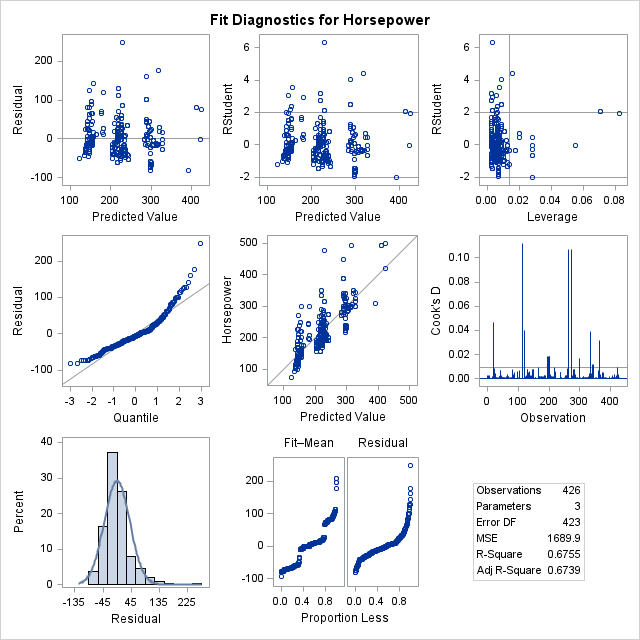

In [48]:
stat_results.DIAGNOSTICSPANEL

### Or display them ALL  (Click in the pannel to the Left of the results below to expand/shrink the result pane)


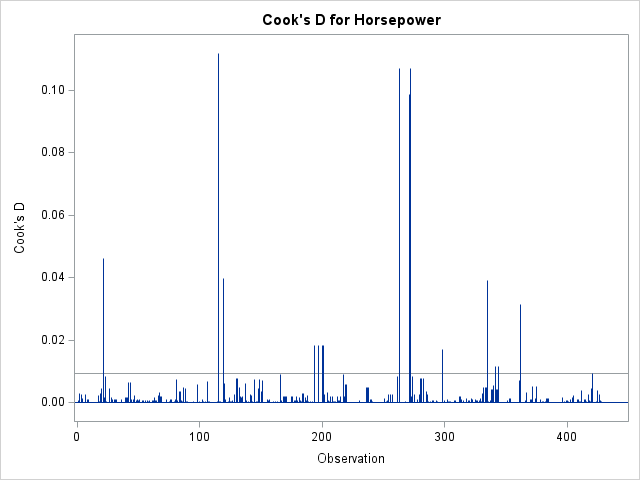


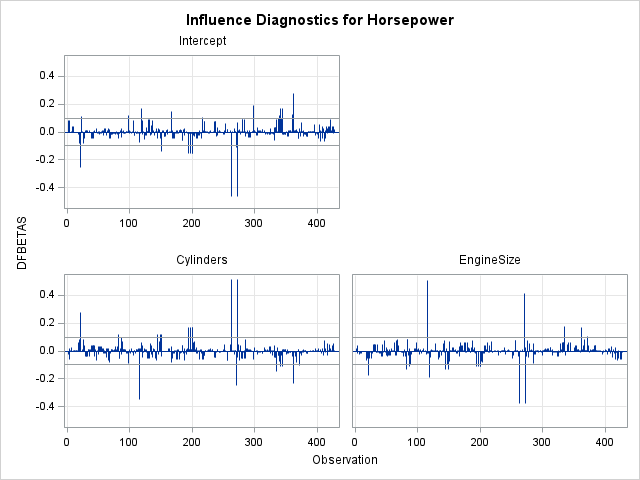


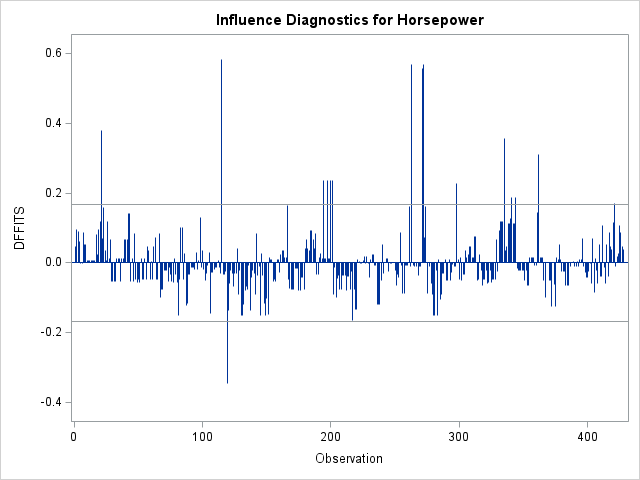


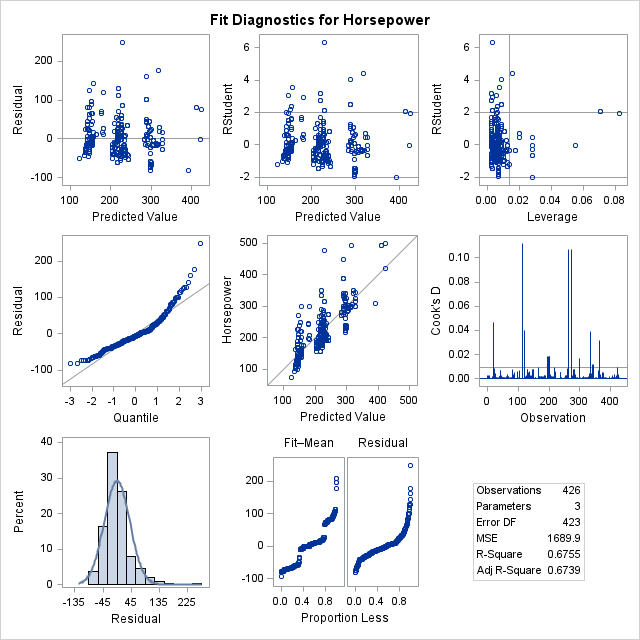

Root MSE,41.10897,R-Square,0.6755
Dependent Mean,215.87793,Adj R-Sq,0.6739
Coeff Var,19.04269,,


Number of Observations Read,428
Number of Observations Used,426
Number of Observations with Missing Values,2



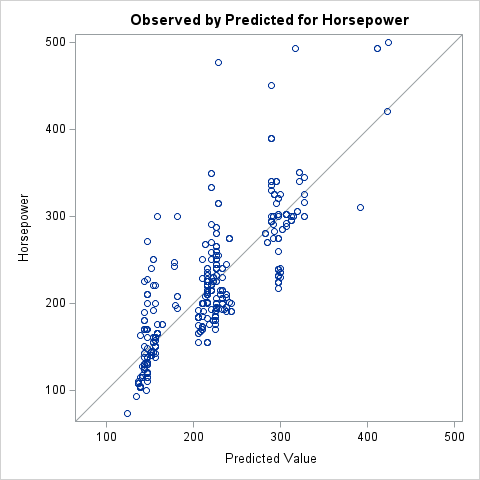


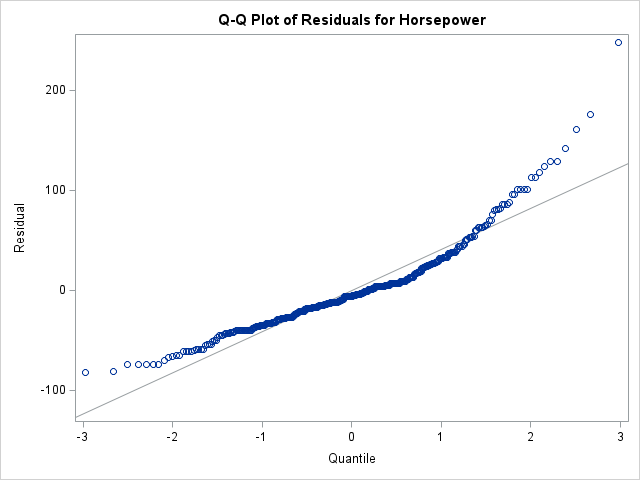


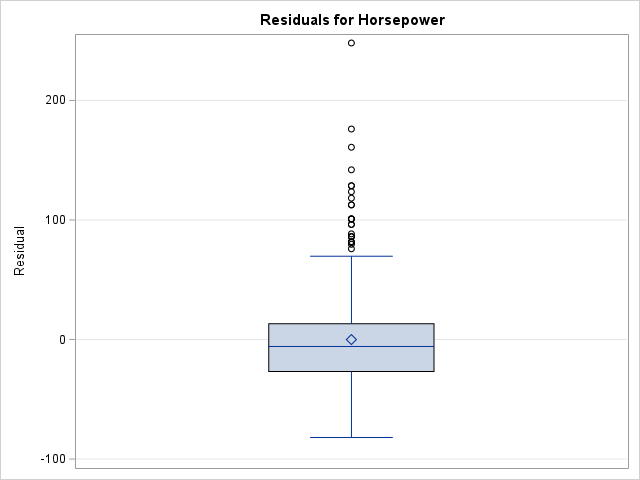


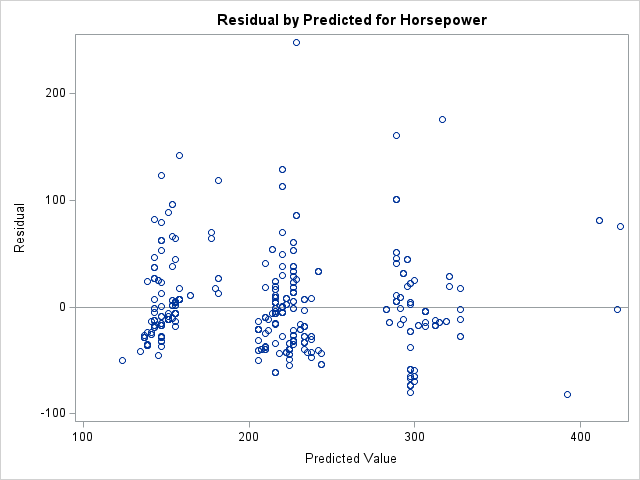


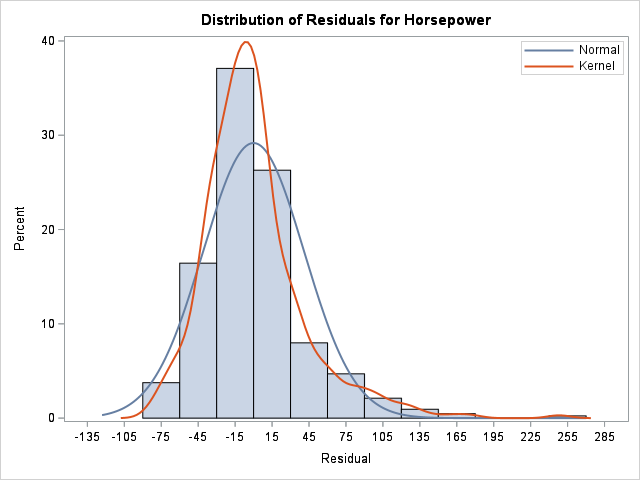


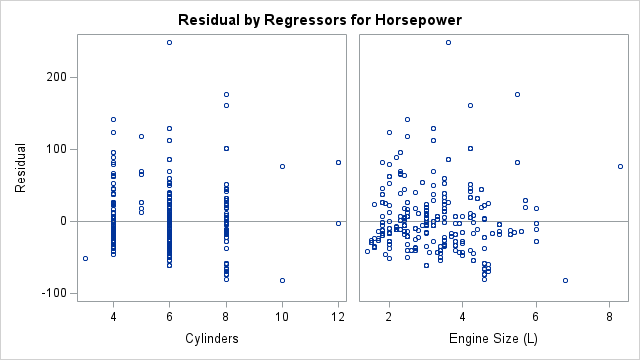


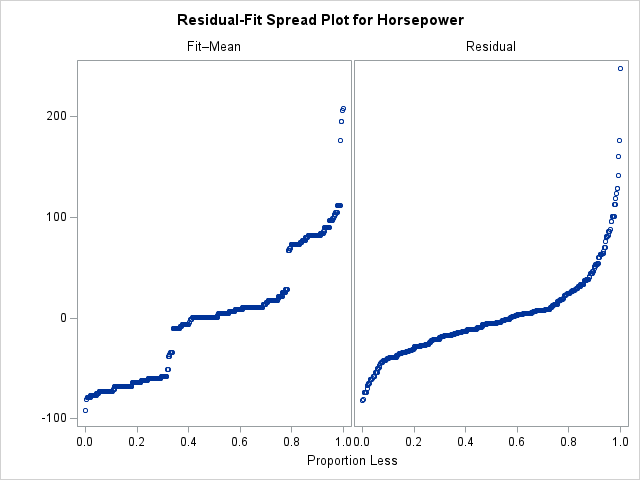


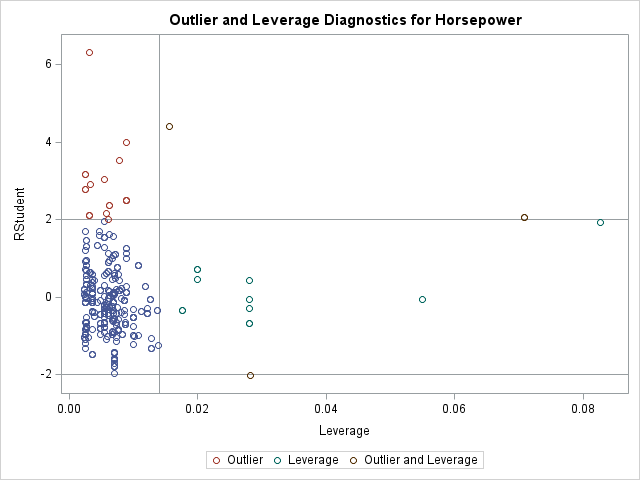


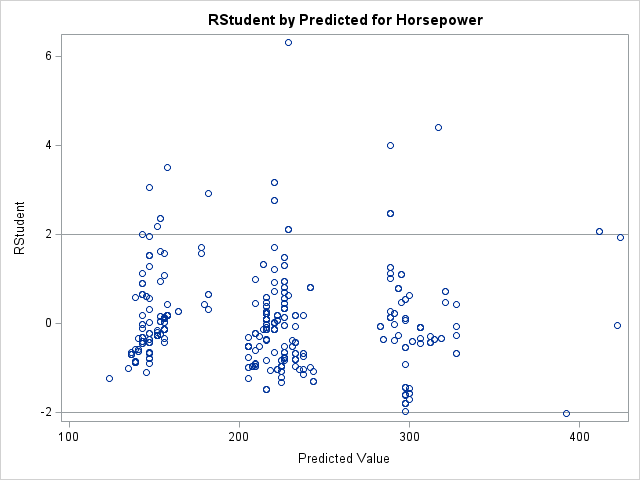

In [49]:
stat_results.ALL()

In [50]:
tree = stat.hpsplit(model='horsepower = Cylinders EngineSize',data=cars)


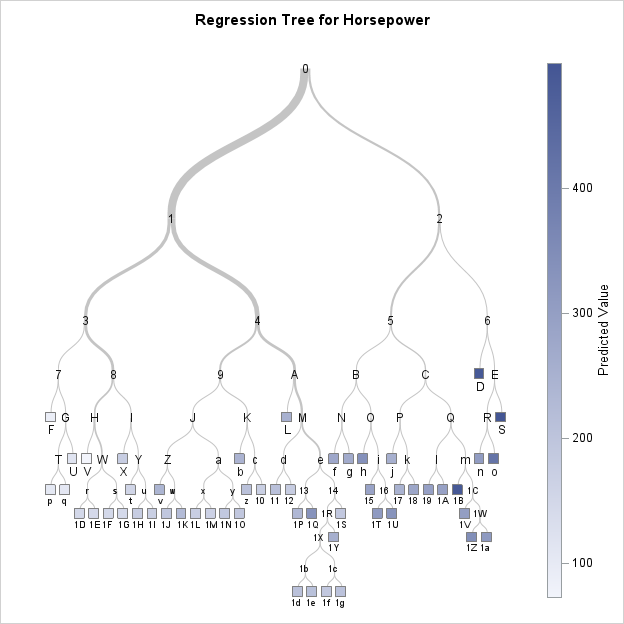

In [51]:
tree.WHOLETREEPLOT


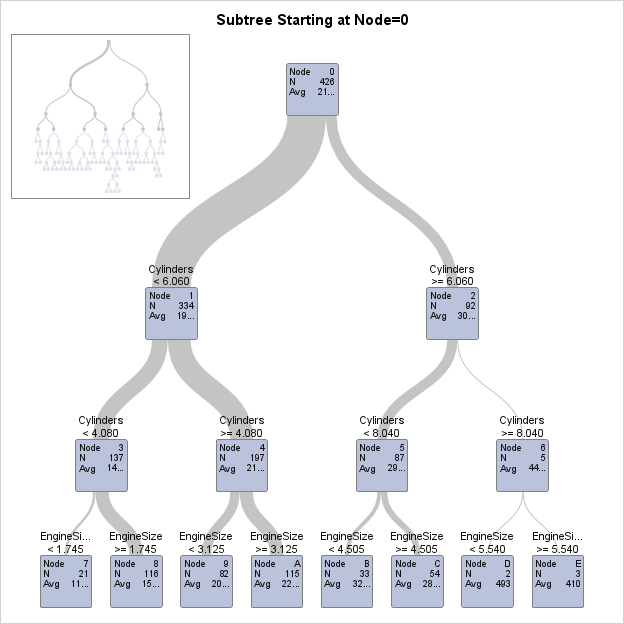

In [52]:
tree.ZOOMEDTREEPLOT

### Proc SQL anyone???  
#### And you can use the SASLIB method of the SASsession to assign any data you like (Teradata, Hadoop, ...)

In [53]:
#sas.saslib('Tera', engine='Teradata', options='user=&me pw=&mypw server=teracop1', prompt={'me': False, 'mypw': True})
sas.submitLOG("""
proc sql; 
   create table sales as select month, sum(actual) as tot_sales, sum(predict) as predicted_sales
   from sashelp.prdsale 
   group by 1 
   order by month;
quit;""")
sales = sas.sasdata('sales')

101                                                        The SAS System                             09:42 Thursday, March 12, 2020

1700       ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
1700     ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
1701       
1702       
1703       proc sql;
1704          create table sales as select month, sum(actual) as tot_sales, sum(predict) as predicted_sales
1705          from sashelp.prdsale
1706          group by 1
1707          order by month;
NOTE: Table WORK.SALES created, with 24 rows and 3 columns.

1708       quit;
NOTE: PROCEDURE SQL used (Total process time):
      real time           0.00 seconds
      cpu time            0.00 seconds
      

1709       
1710       ods html5 (id=saspy_internal) close;ods listing;
1711       


### Let's chart our sales for the aggregate table we created with the Proc SQL


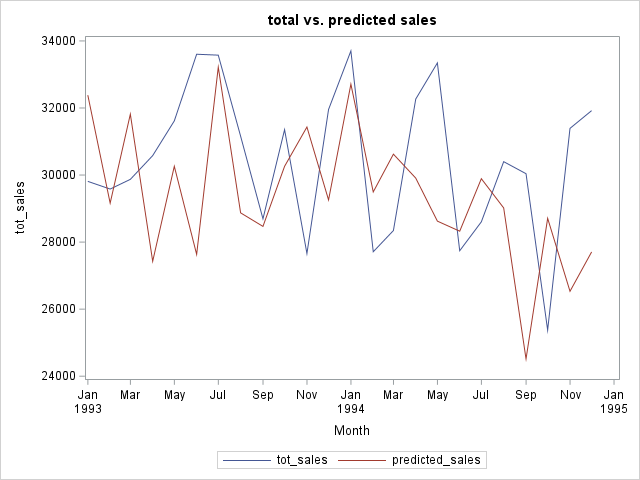

In [54]:
sales.series(y=['tot_sales','predicted_sales'], x='month', title='total vs. predicted sales')

### Slide reference: Specific Features; Runtime Environments

## How would we get these results in a batch python script? Set batch to True and get the HTML returned to you to write out to a file and view later

In [55]:
sas.set_batch (True)

In [56]:
q = stat_results.DFBETASPANEL

### q is the Dict with the LOG and LST. The LST is the HTML of the result. We'll display it here, but if you write it to a file it will render when you open it in a web browser too.


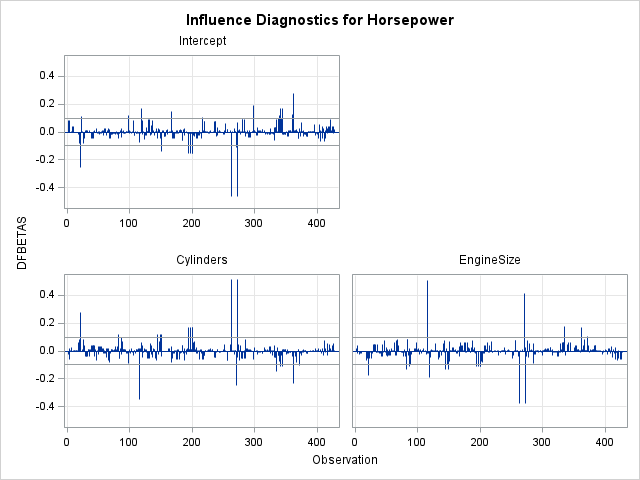

In [57]:
sas.HTML(q['LST'])

### the ALL() method returns a List of Dict's which is easy to traverse. Can write them out to their own files to view later. Just display them here for now.


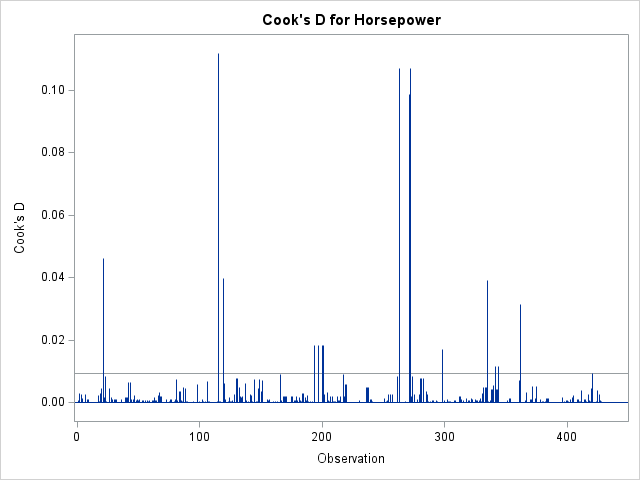


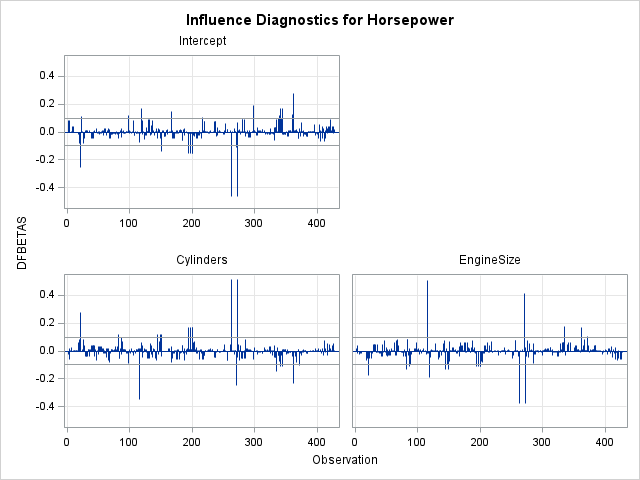


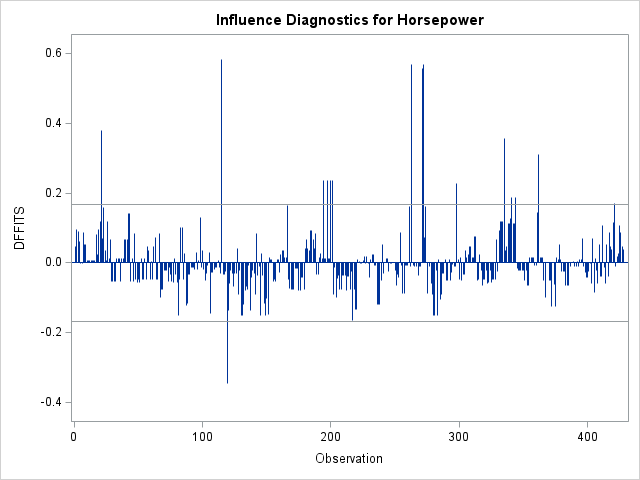


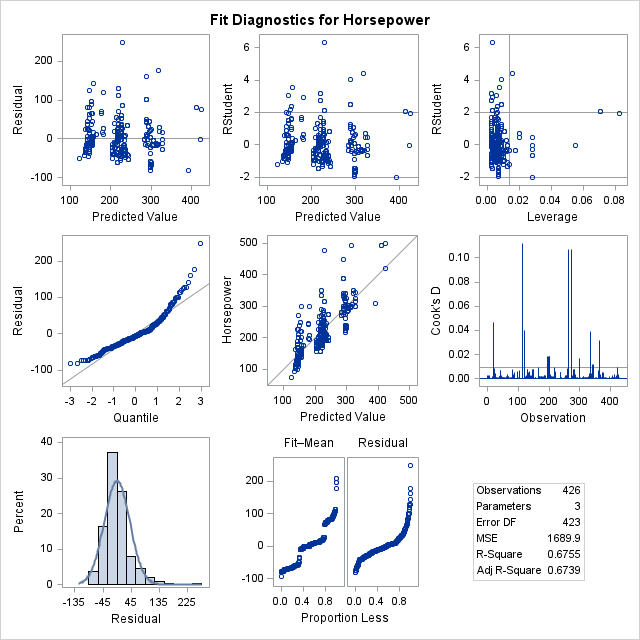

Root MSE,41.10897,R-Square,0.6755
Dependent Mean,215.87793,Adj R-Sq,0.6739
Coeff Var,19.04269,,


Number of Observations Read,428
Number of Observations Used,426
Number of Observations with Missing Values,2



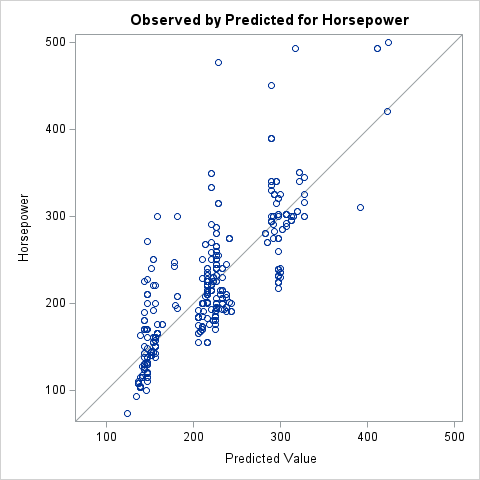


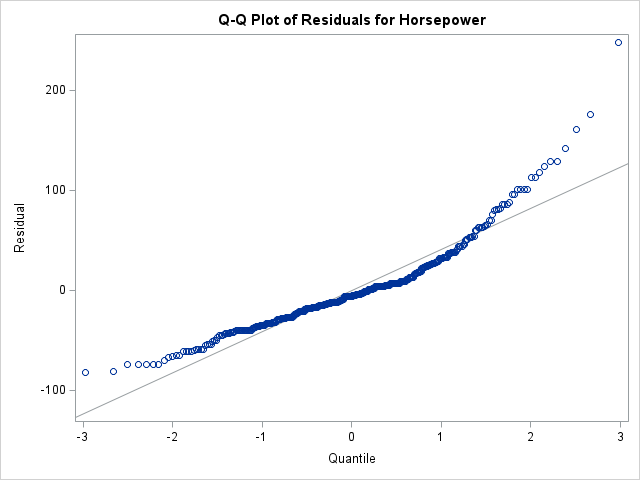


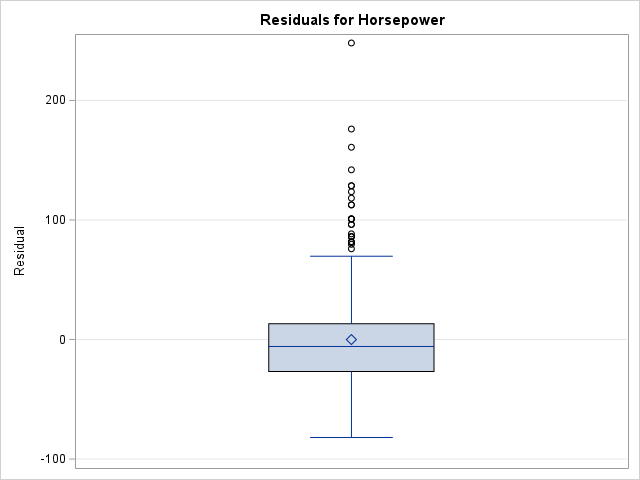


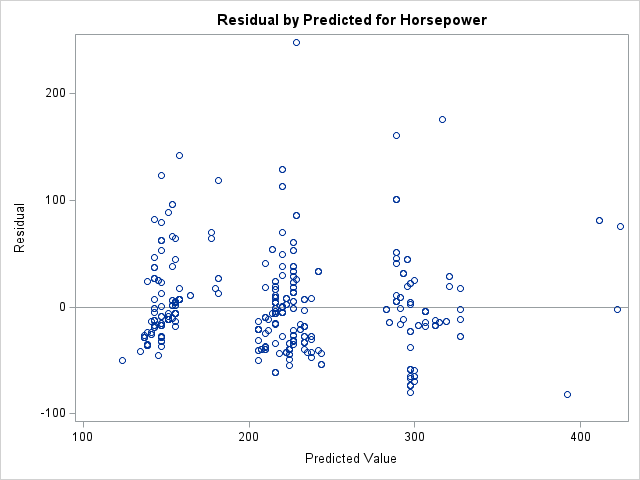


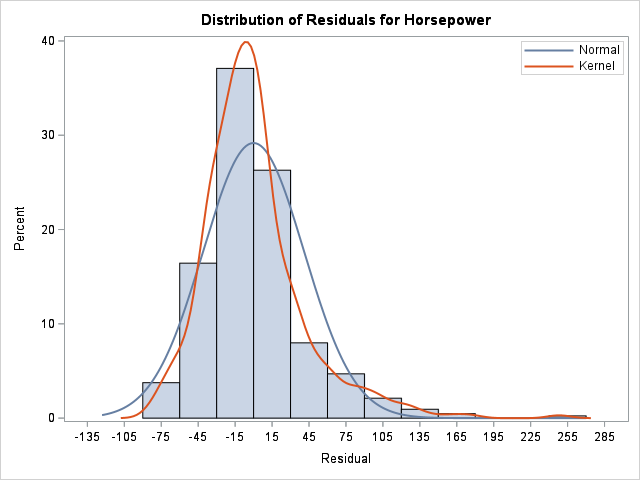


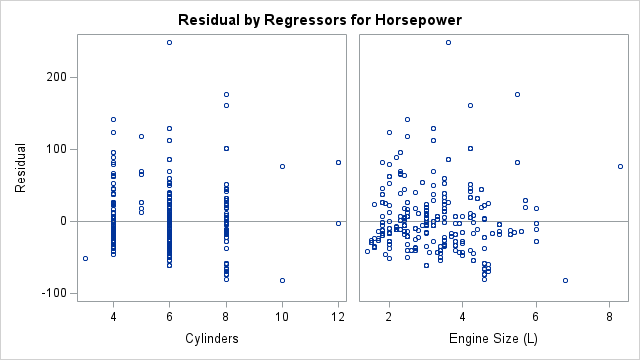


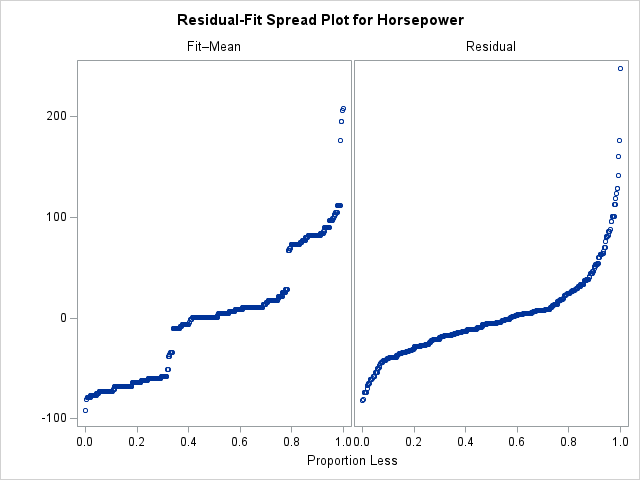


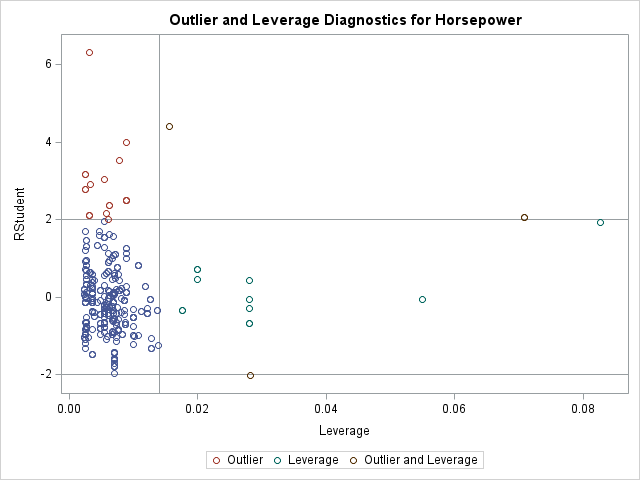


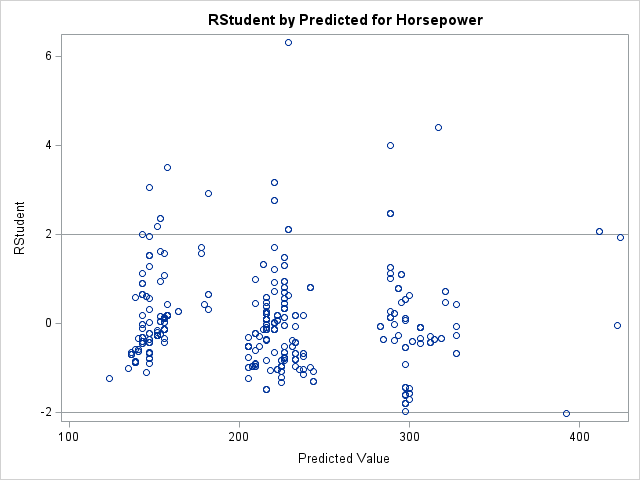

In [58]:
x = stat_results.ALL()
for i in range(len(x)):
    if isinstance(x[i], dict):
        sas.DISPLAY(sas.HTML(x[i]['LST']))
    else: # log is a string, not a dict
        print(x[i])

## So lets write these out to the local file system as if this were a python batch script

In [59]:
for i in range(len(stat_results._names)):
    x = stat_results.__getattr__(stat_results._names[i])
    if type(x) is not str:
        out1 = open("c:\\public\\saspy_demo\\"+stat_results._names[i]+".html", mode='w+b')
        out1.write(x['LST'].encode())
        out1.close()
    else:
        out1 = open("c:\\public\\saspy_demo\\"+stat_results._names[i]+".log", mode='w+b')
        out1.write(x.encode())
        out1.close()

In [60]:
sas.set_batch (False)

### Slide reference: Specific Features; Filesystem Interaction

# You can interact with the filesystem on the SAS Server side
### in this case I'm running a local connection, so it's the same file system

In [61]:
# get a list of files and directories for this directory. Directories end with the file seperator
sas.dirlist('c:\\public\\saspy_demo')

['UpDown\\',
 'RSTUDENTBYPREDICTED.html',
 'RSTUDENTBYLEVERAGE.html',
 'RFPLOT.html',
 'RESIDUALPLOT.html',
 'RESIDUALHISTOGRAM.html',
 'RESIDUALBYPREDICTED.html',
 'RESIDUALBOXPLOT.html',
 'QQPLOT.html',
 'PARAMETERESTIMATES.html',
 'OBSERVEDBYPREDICTED.html',
 'nobs_upx.html',
 'nobs_up.html',
 'NOBS.html',
 'LOG.log',
 'libm\\',
 'libk\\',
 'lib2\\',
 'lib1\\',
 'FITSTATISTICS.html',
 'ETS_RESULTS\\',
 'DIAGNOSTICSPANEL.html',
 'DFFITSPLOT.html',
 'DFBETASPANEL.html',
 'COOKSDPLOT.html',
 'ANOVA.html']

# Since this is Python, you can write a little code to make this more useful

In [62]:
import os
files = sas.dirlist("c:\\public\\saspy_demo")
for file in files:
    f = "c:\\public\\saspy_demo\\"+file
    if f[len(f)-1] == sas.hostsep:
        print('Directory '+f+' contains:')
        for f in sas.dirlist(f):
           print('\t'+f)
        print('\n')
    else:
        print('Next File is '+f)
        inf = sas.file_info(f)
        for key in inf.keys():
            print(key+": "+inf[key])
        print('\n')

Directory c:\public\saspy_demo\UpDown\ contains:
	nobs_up.html


Next File is c:\public\saspy_demo\RSTUDENTBYPREDICTED.html
Filename: c:\public\saspy_demo\RSTUDENTBYPREDICTED.html
RECFM: V
LRECL: 32767
File Size (bytes): 60066
Last Modified: 12Mar2020:09:42:41
Create Time: 11Oct2017:08:13:05


Next File is c:\public\saspy_demo\RSTUDENTBYLEVERAGE.html
Filename: c:\public\saspy_demo\RSTUDENTBYLEVERAGE.html
RECFM: V
LRECL: 32767
File Size (bytes): 63081
Last Modified: 12Mar2020:09:42:41
Create Time: 11Oct2017:08:13:05


Next File is c:\public\saspy_demo\RFPLOT.html
Filename: c:\public\saspy_demo\RFPLOT.html
RECFM: V
LRECL: 32767
File Size (bytes): 53156
Last Modified: 12Mar2020:09:42:40
Create Time: 11Oct2017:08:13:04


Next File is c:\public\saspy_demo\RESIDUALPLOT.html
Filename: c:\public\saspy_demo\RESIDUALPLOT.html
RECFM: V
LRECL: 32767
File Size (bytes): 56476
Last Modified: 12Mar2020:09:42:40
Create Time: 11Oct2017:08:13:04


Next File is c:\public\saspy_demo\RESIDUALHISTOGRAM.html


### Now let's use the upload and download methods, then look at those files
#### Again, I'm on the same local filesystem, but this works when it's different systems

In [63]:
res = sas.upload('c:\\public\\saspy_demo\\nobs.html', 'c:\\public\\saspy_demo\\UpDown\\nobs_up.html')
if not res['Success']:
       print(res['LOG'])

In [64]:
res = sas.download('c:\\public\\saspy_demo',          'c:\\public\\saspy_demo\\UpDown\\nobs_up.html')
if not res['Success']:
       print(res['LOG'])

In [65]:
sas.dirlist('c:\\public\\saspy_demo')

['UpDown\\',
 'RSTUDENTBYPREDICTED.html',
 'RSTUDENTBYLEVERAGE.html',
 'RFPLOT.html',
 'RESIDUALPLOT.html',
 'RESIDUALHISTOGRAM.html',
 'RESIDUALBYPREDICTED.html',
 'RESIDUALBOXPLOT.html',
 'QQPLOT.html',
 'PARAMETERESTIMATES.html',
 'OBSERVEDBYPREDICTED.html',
 'nobs_upx.html',
 'nobs_up.html',
 'NOBS.html',
 'LOG.log',
 'libm\\',
 'libk\\',
 'lib2\\',
 'lib1\\',
 'FITSTATISTICS.html',
 'ETS_RESULTS\\',
 'DIAGNOSTICSPANEL.html',
 'DFFITSPLOT.html',
 'DFBETASPANEL.html',
 'COOKSDPLOT.html',
 'ANOVA.html']

In [66]:
sas.file_info('c:\\public\\saspy_demo\\nobs_up.html')

{'Create Time': '12Mar2019:08:24:22',
 'File Size (bytes)': '32656',
 'Filename': 'c:\\public\\saspy_demo\\nobs_up.html',
 'LRECL': '32767',
 'Last Modified': '12Mar2020:09:42:47',
 'RECFM': 'V'}

In [67]:
sas.file_info('c:\\public\\saspy_demo\\updown\\nobs_up.html')

{'Create Time': '12Mar2019:08:22:12',
 'File Size (bytes)': '32656',
 'Filename': 'c:\\public\\saspy_demo\\updown\\nobs_up.html',
 'LRECL': '32767',
 'Last Modified': '12Mar2020:09:42:46',
 'RECFM': 'V'}